# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Brian Sangapta]
- **Email:** [briansangapta@gmail.com]
- **ID Dicoding:** [z0zero]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan) dan faktor cuaca, serta bagaimana hal ini dapat membantu optimalisasi ketersediaan sepeda?
- Pertanyaan 2: Apa faktor-faktor yang paling mempengaruhi jumlah peminjaman sepeda dan bagaimana korelasi antara faktor-faktor tersebut dengan tingkat permintaan?


## Import Semua Packages/Library yang Digunakan

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical analysis
from scipy import stats

# Date handling
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling
##### Unggah dataset ke Google Colab:

In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [3]:
import zipfile
import os

# Buat direktori ./data jika belum ada
os.makedirs('./data', exist_ok=True)

# Ekstrak file archive.zip ke direktori ./data
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

### Gathering Data

##### Membaca kedua file CSV

In [4]:
df_day = pd.read_csv('./data/day.csv')
df_hour = pd.read_csv('./data/hour.csv')

##### Menampilkan informasi dasar kedua dataset

In [5]:
print("Informasi Dataset Harian:")
print(df_day.info())
print("\nSample 5 baris pertama dataset harian:")
print(df_day.head())

print("\n" + "="*50 + "\n")

print("Informasi Dataset Per Jam:")
print(df_hour.info())
print("\nSample 5 baris pertama dataset per jam:")
print(df_hour.head())

Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Sample 5 baris pertama dataset harian:
   instant      dteday

##### Memeriksa missing values

In [6]:
print("\nMissing values dalam dataset harian:")
print(df_day.isnull().sum())
print("\nMissing values dalam dataset per jam:")
print(df_hour.isnull().sum())


Missing values dalam dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values dalam dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight dari Gathering Data:**
- Dataset terbagi menjadi data harian (731 baris) dan per jam (17,379 baris) dengan kualitas data yang baik (tidak ada missing values)
- Fitur target adalah total peminjaman sepeda ('cnt') yang terbagi menjadi pengguna kasual dan terdaftar
- Tersedia berbagai fitur temporal (tahun, bulan, hari, jam) dan kondisional (cuaca, suhu, kelembaban, angin) untuk analisis mendalam
- Data mencakup periode 2 tahun (2011-2012) dengan granularitas hingga level per jam
- Semua fitur numerik sudah terisi lengkap dengan tipe data yang konsisten (int64, float64) dan 1 kolom tanggal (object)

### Assessing Data

In [7]:
# Fungsi untuk menampilkan statistik deskriptif
def show_statistics(df, title):
    print(f"\n{title}")
    print("\nStatistik Deskriptif:")
    print(df.describe())

    print("\nInformasi Tipe Data:")
    print(df.dtypes)

    print("\nNilai Unik per Kolom:")
    for column in df.columns:
        print(f"\n{column}:")
        if df[column].dtype == 'object':
            print(df[column].unique()[:5], "...")  # Tampilkan 5 nilai unik pertama untuk data object
        else:
            print(df[column].unique()[:5], "...")  # Tampilkan 5 nilai unik pertama untuk data numerik

# Analisis dataset harian
print("="*50)
print("ANALISIS DATASET HARIAN")
print("="*50)
show_statistics(df_day, "Dataset Harian")

# Analisis dataset per jam
print("\n"+"="*50)
print("ANALISIS DATASET PER JAM")
print("="*50)
show_statistics(df_hour, "Dataset Per Jam")

# Memeriksa korelasi untuk variabel numerik
print("\n"+"="*50)
print("MATRIKS KORELASI - DATASET HARIAN")
print("="*50)
correlation_matrix = df_day.select_dtypes(include=[np.number]).corr()
print(correlation_matrix[['casual', 'registered', 'cnt']].sort_values(by='cnt', ascending=False))

ANALISIS DATASET HARIAN

Dataset Harian

Statistik Deskriptif:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    

**Insight dari Assessing Data:**
- Pola Penggunaan:
  * Rata-rata peminjaman harian: 4,504 sepeda (848 casual, 3,656 registered)
  * Rata-rata peminjaman per jam: 189 sepeda (36 casual, 154 registered)
  * Pengguna terdaftar (registered) mendominasi 81% dari total peminjaman

- Korelasi Kuat (berdasarkan total peminjaman/cnt):
  * Registered users (0.945): Kontributor utama total peminjaman
  * Casual users (0.672): Memiliki korelasi moderat
  * Suhu (temp/atemp ~0.63): Faktor cuaca yang paling berpengaruh
  * Tahun (0.566): Menunjukkan trend peningkatan penggunaan

- Korelasi Negatif:
  * Cuaca buruk (-0.297): Menurunkan jumlah peminjaman
  * Kecepatan angin (-0.234): Sedikit mengurangi peminjaman
  * Kelembaban (-0.100): Pengaruh minimal terhadap peminjaman

- Distribusi Data:
  * Weathersit: Mayoritas cuaca baik (1-2), jarang cuaca buruk (3-4)
  * Workingday: 68% hari kerja
  * Holiday: Hanya 2.8% hari adalah hari libur

### Cleaning Data

In [8]:
# Function untuk mengubah format tanggal
def clean_datetime(df):
    df['dteday'] = pd.to_datetime(df['dteday'])
    return df

# Function untuk mapping nilai kategorikal
def map_categories(df):
    # Mapping untuk season
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    df['season'] = df['season'].map(season_map)

    # Mapping untuk weathersit
    weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
    df['weathersit'] = df['weathersit'].map(weather_map)

    # Mapping untuk yr
    df['yr'] = df['yr'].map({0: 2011, 1: 2012})

    return df

# Function untuk denormalisasi nilai numerik
def denormalize_temp(df):
    # Denormalisasi suhu (temp dan atemp)
    df['temp'] = df['temp'] * 41  # T(°C) = t * (max - min) + min = t * 41 + (-8) = t * 41 - 8
    df['temp'] = df['temp'] - 8
    df['atemp'] = df['atemp'] * 50  # T(°C) = t * (max - min) + min = t * 50 + (-16) = t * 50 - 16
    df['atemp'] = df['atemp'] - 16

    # Denormalisasi humidity
    df['hum'] = df['hum'] * 100

    # Denormalisasi windspeed
    df['windspeed'] = df['windspeed'] * 67

    return df

# Membersihkan data harian
df_day_clean = df_day.copy()
df_day_clean = clean_datetime(df_day_clean)
df_day_clean = map_categories(df_day_clean)
df_day_clean = denormalize_temp(df_day_clean)

# Membersihkan data per jam
df_hour_clean = df_hour.copy()
df_hour_clean = clean_datetime(df_hour_clean)
df_hour_clean = map_categories(df_hour_clean)
df_hour_clean = denormalize_temp(df_hour_clean)

# Menampilkan informasi hasil cleaning
print("=== Hasil Cleaning Data Harian ===")
print("\nSample data setelah cleaning:")
print(df_day_clean.head())
print("\nInformasi dataset setelah cleaning:")
print(df_day_clean.info())

print("\n=== Hasil Cleaning Data Per Jam ===")
print("\nSample data setelah cleaning:")
print(df_hour_clean.head())
print("\nInformasi dataset setelah cleaning:")
print(df_hour_clean.info())

# Memeriksa nilai yang tidak valid atau ekstrem
print("\n=== Pemeriksaan Nilai Ekstrem ===")
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in numerical_cols:
    print(f"\nStatistik untuk {col}:")
    print(df_day_clean[col].describe())

=== Hasil Cleaning Data Harian ===

Sample data setelah cleaning:
   instant     dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01  Spring  2011     1        0        6           0   
1        2 2011-01-02  Spring  2011     1        0        0           0   
2        3 2011-01-03  Spring  2011     1        0        1           1   
3        4 2011-01-04  Spring  2011     1        0        2           1   
4        5 2011-01-05  Spring  2011     1        0        3           1   

  weathersit      temp    atemp      hum  windspeed  casual  registered   cnt  
0       Mist  6.110847  2.18125  80.5833  10.749882     331         654   985  
1       Mist  6.902598  1.68695  69.6087  16.652113     131         670   801  
2      Clear  0.050924 -6.52975  43.7273  16.636703     120        1229  1349  
3      Clear  0.200000 -5.39390  59.0435  10.739832     108        1454  1562  
4      Clear  1.305237 -4.53650  43.6957  12.522300      82        1518  1600  

In

**Insight dari Cleaning Data:**
- Transformasi Data Berhasil:
  * Format tanggal diubah ke datetime64
  * Kategori musim diubah dari angka ke text (1-4 → Spring, Summer, Fall, Winter)
  * Kondisi cuaca diubah ke bentuk deskriptif (1-4 → Clear, Mist, Light Snow/Rain, Heavy Rain/Snow)
  * Tahun diubah dari binary ke actual year (0,1 → 2011, 2012)

- Hasil Denormalisasi Variabel Cuaca:
  * Suhu (temp): -5.57°C hingga 27.32°C (rata-rata 12.31°C)
  * Suhu yang dirasakan (atemp): -12.04°C hingga 26.04°C (rata-rata 7.71°C)
  * Kelembaban: 0% hingga 97.25% (rata-rata 62.78%)
  * Kecepatan angin: 1.5 hingga 34 km/jam (rata-rata 12.76 km/jam)

- Struktur Data:
  * Dataset harian: 731 baris x 16 kolom
  * Dataset per jam: 17,379 baris x 17 kolom (tambahan kolom 'hr')
  * Tidak ada missing values di kedua dataset
  * Tipe data sudah sesuai: datetime64[ns](1), float64(4), int64(9/10), object(2)

- Nilai Ekstrem yang Perlu Diperhatikan:
  * Kelembaban minimum 0% perlu divalidasi
  * Perbedaan signifikan antara temp dan atemp pada kondisi ekstrem

## Exploratory Data Analysis (EDA)

### Explore ...

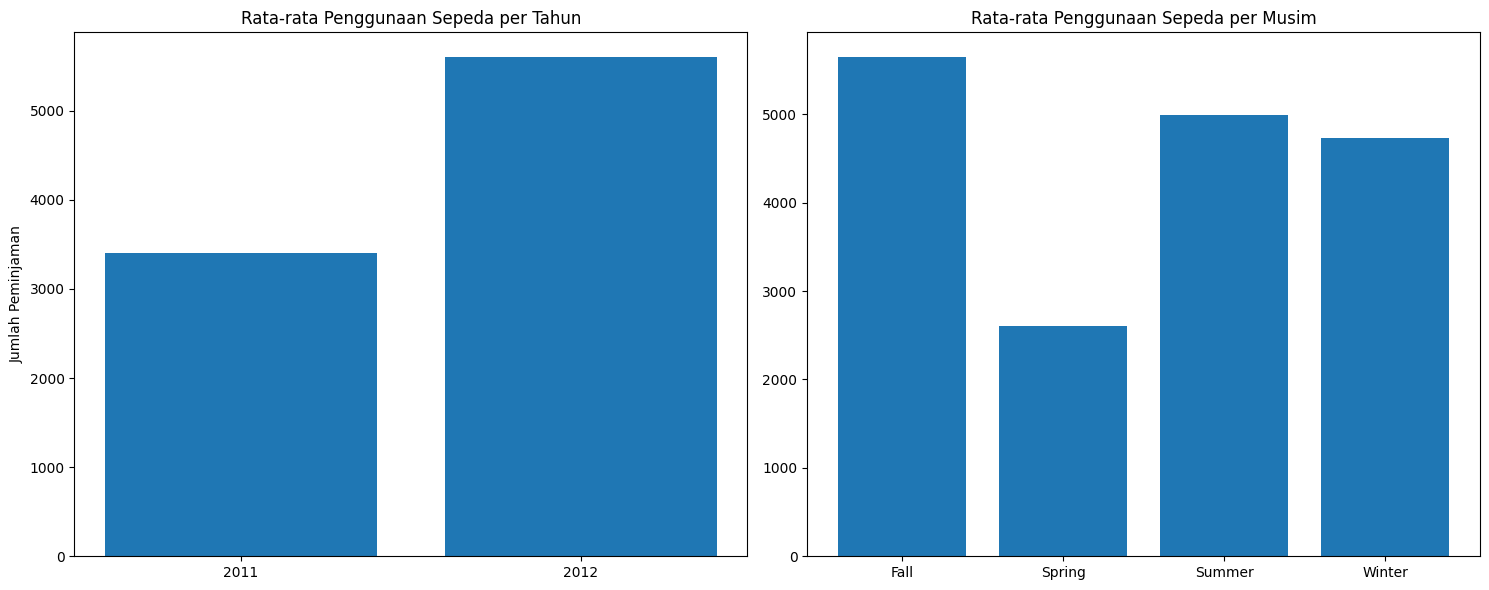

<Figure size 1000x600 with 0 Axes>

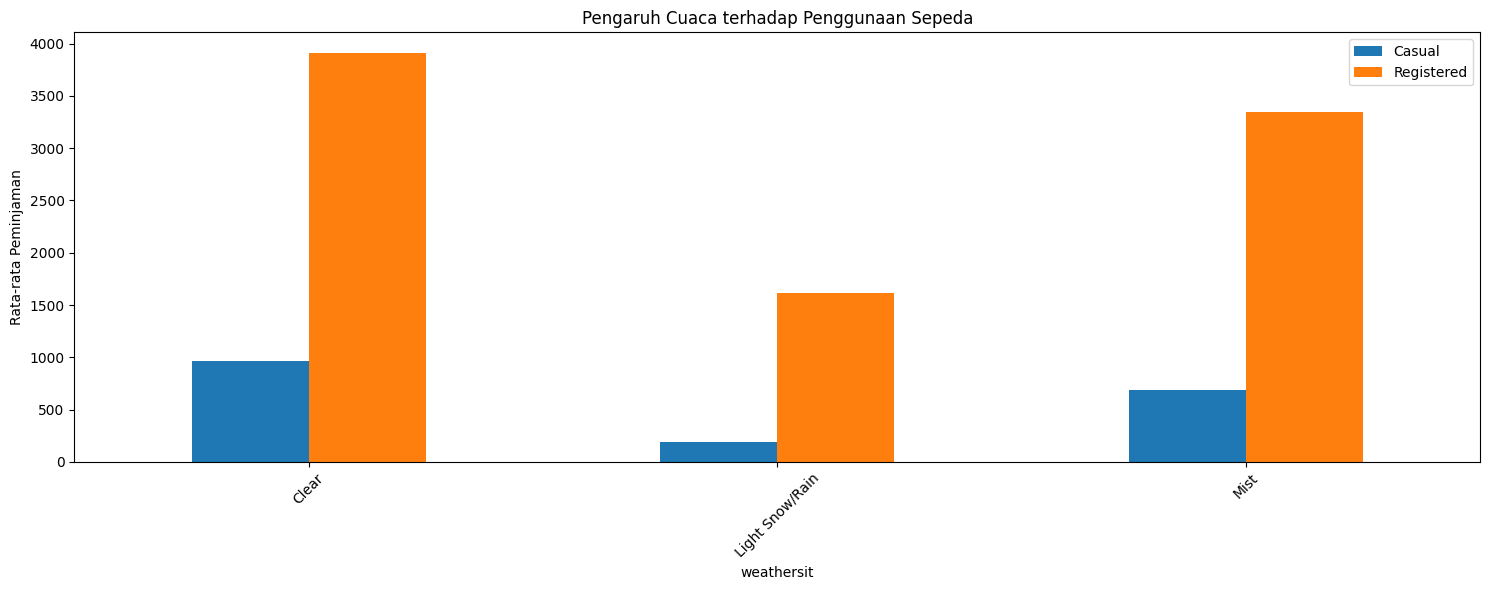

<Figure size 1200x600 with 0 Axes>

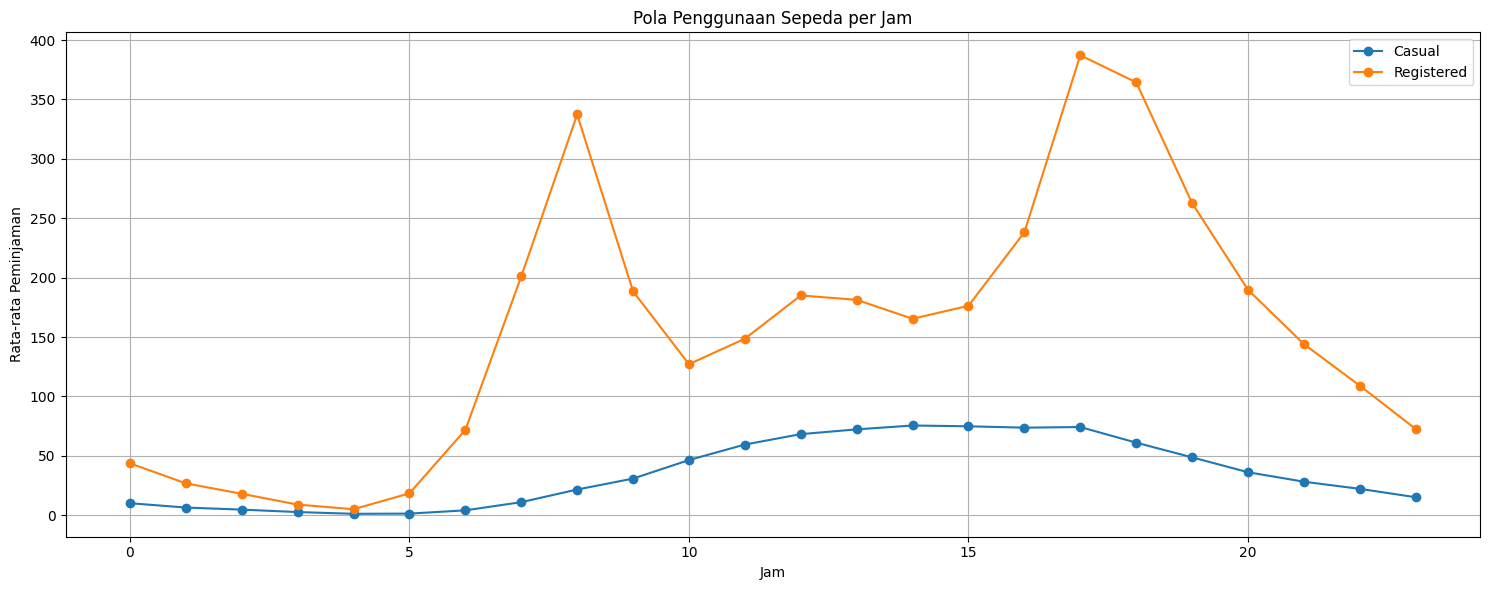

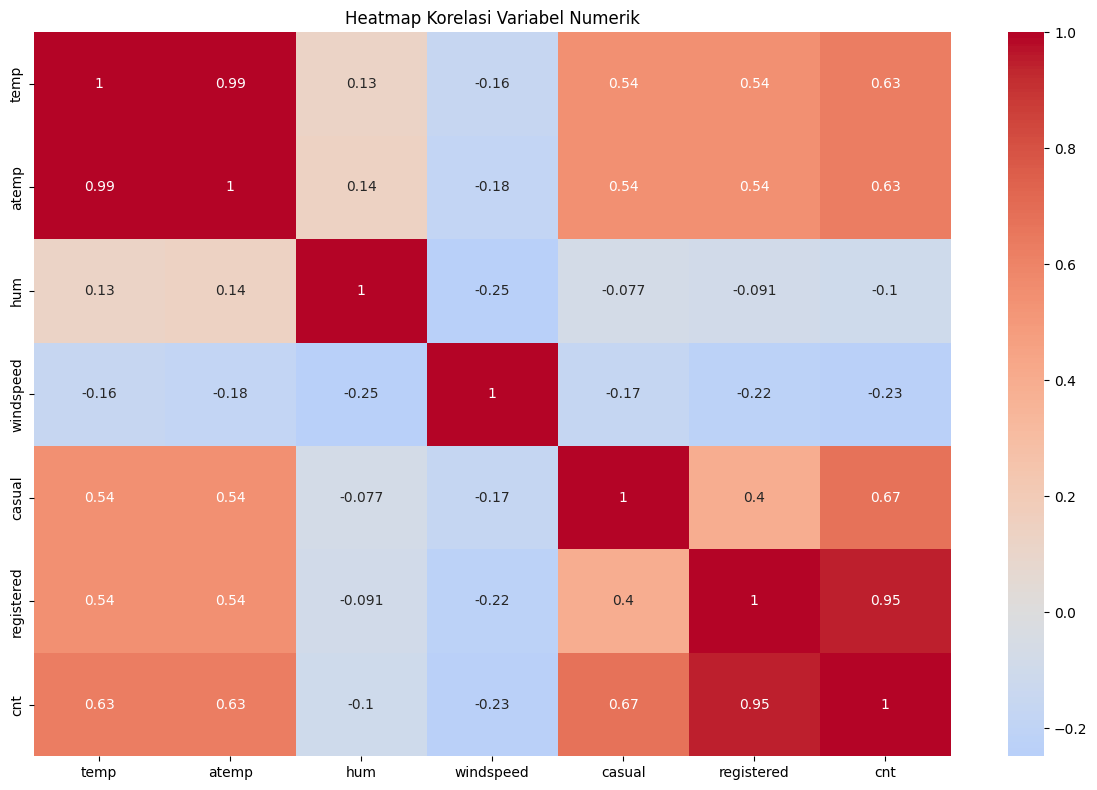


Statistik Deskriptif Penggunaan Sepeda:
            casual   registered          cnt
count   731.000000   731.000000   731.000000
mean    848.176471  3656.172367  4504.348837
std     686.622488  1560.256377  1937.211452
min       2.000000    20.000000    22.000000
25%     315.500000  2497.000000  3152.000000
50%     713.000000  3662.000000  4548.000000
75%    1096.000000  4776.500000  5956.000000
max    3410.000000  6946.000000  8714.000000

Perbandingan Rata-rata Penggunaan (Hari Kerja vs Libur):
                 casual   registered          cnt
workingday                                       
0           1371.134199  2959.034632  4330.168831
1            606.570000  3978.250000  4584.820000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure size
plt.rcParams['figure.figsize'] = (15, 6)

# 1. Analisis Tren Penggunaan Sepeda per Tahun dan Musim
fig, (ax1, ax2) = plt.subplots(1, 2)

# Tren per tahun
yearly_trend = df_day_clean.groupby('yr')['cnt'].mean()
ax1.bar(yearly_trend.index.astype(str), yearly_trend.values)
ax1.set_title('Rata-rata Penggunaan Sepeda per Tahun')
ax1.set_ylabel('Jumlah Peminjaman')

# Tren per musim
seasonal_trend = df_day_clean.groupby('season')['cnt'].mean()
ax2.bar(seasonal_trend.index, seasonal_trend.values)
ax2.set_title('Rata-rata Penggunaan Sepeda per Musim')
plt.tight_layout()
plt.show()

# 2. Analisis Penggunaan Berdasarkan Kondisi Cuaca
plt.figure(figsize=(10, 6))
weather_trend = df_day_clean.groupby('weathersit')[['casual', 'registered']].mean()
weather_trend.plot(kind='bar')
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(rotation=45)
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()

# 3. Pola Penggunaan per Jam (menggunakan data hourly)
plt.figure(figsize=(12, 6))
hourly_pattern = df_hour_clean.groupby('hr')[['casual', 'registered']].mean()
hourly_pattern.plot(kind='line', marker='o')
plt.title('Pola Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman')
plt.grid(True)
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()

# 4. Heatmap Korelasi
plt.figure(figsize=(12, 8))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation = df_day_clean[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()

# 5. Statistik Deskriptif
print("\nStatistik Deskriptif Penggunaan Sepeda:")
print(df_day_clean[['casual', 'registered', 'cnt']].describe())

# 6. Perbandingan Hari Kerja vs Hari Libur
work_holiday_comparison = df_day_clean.groupby('workingday')[['casual', 'registered', 'cnt']].mean()
print("\nPerbandingan Rata-rata Penggunaan (Hari Kerja vs Libur):")
print(work_holiday_comparison)

**Insight dari Exploratory Data Analysis:**

1. Tren Tahunan:
   * Terjadi peningkatan signifikan dari 2011 ke 2012 (~3,300 ke ~5,500 peminjaman)
   * Menunjukkan pertumbuhan popularitas layanan bike sharing

2. Pola Musiman:
   * Fall (Musim Gugur): Paling populer (~5,500 peminjaman)
   * Summer (Musim Panas): Kedua terpopuler (~5,000 peminjaman)
   * Winter & Spring: Lebih rendah (~4,700 & ~2,600 peminjaman)
   * Menunjukkan pengaruh cuaca terhadap penggunaan sepeda

3. Statistik Penggunaan:
   * Rata-rata harian: 4,504 peminjaman
   * Minimum: 22 peminjaman
   * Maximum: 8,714 peminjaman
   * Pengguna terdaftar (registered) mendominasi dengan rata-rata 3,656 vs 848 casual

4. Pola Hari Kerja vs Libur:
   * Hari Kerja:
     - Total: 4,585 peminjaman
     - Registered users lebih tinggi (3,978)
     - Casual users lebih rendah (607)
   * Hari Libur:
     - Total: 4,330 peminjaman
     - Registered users lebih rendah (2,959)
     - Casual users lebih tinggi (1,371)
   * Menunjukkan registered users cenderung untuk commuting, sementara casual users untuk rekreasi

5. Distribusi:
   * Data menunjukkan variasi yang besar (std: 1,937)
   * 50% peminjaman berada antara 3,152-5,956 per hari
   * Menunjukkan stabilitas penggunaan dengan beberapa puncak musiman

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan) dan faktor cuaca, serta bagaimana hal ini dapat membantu optimalisasi ketersediaan sepeda?

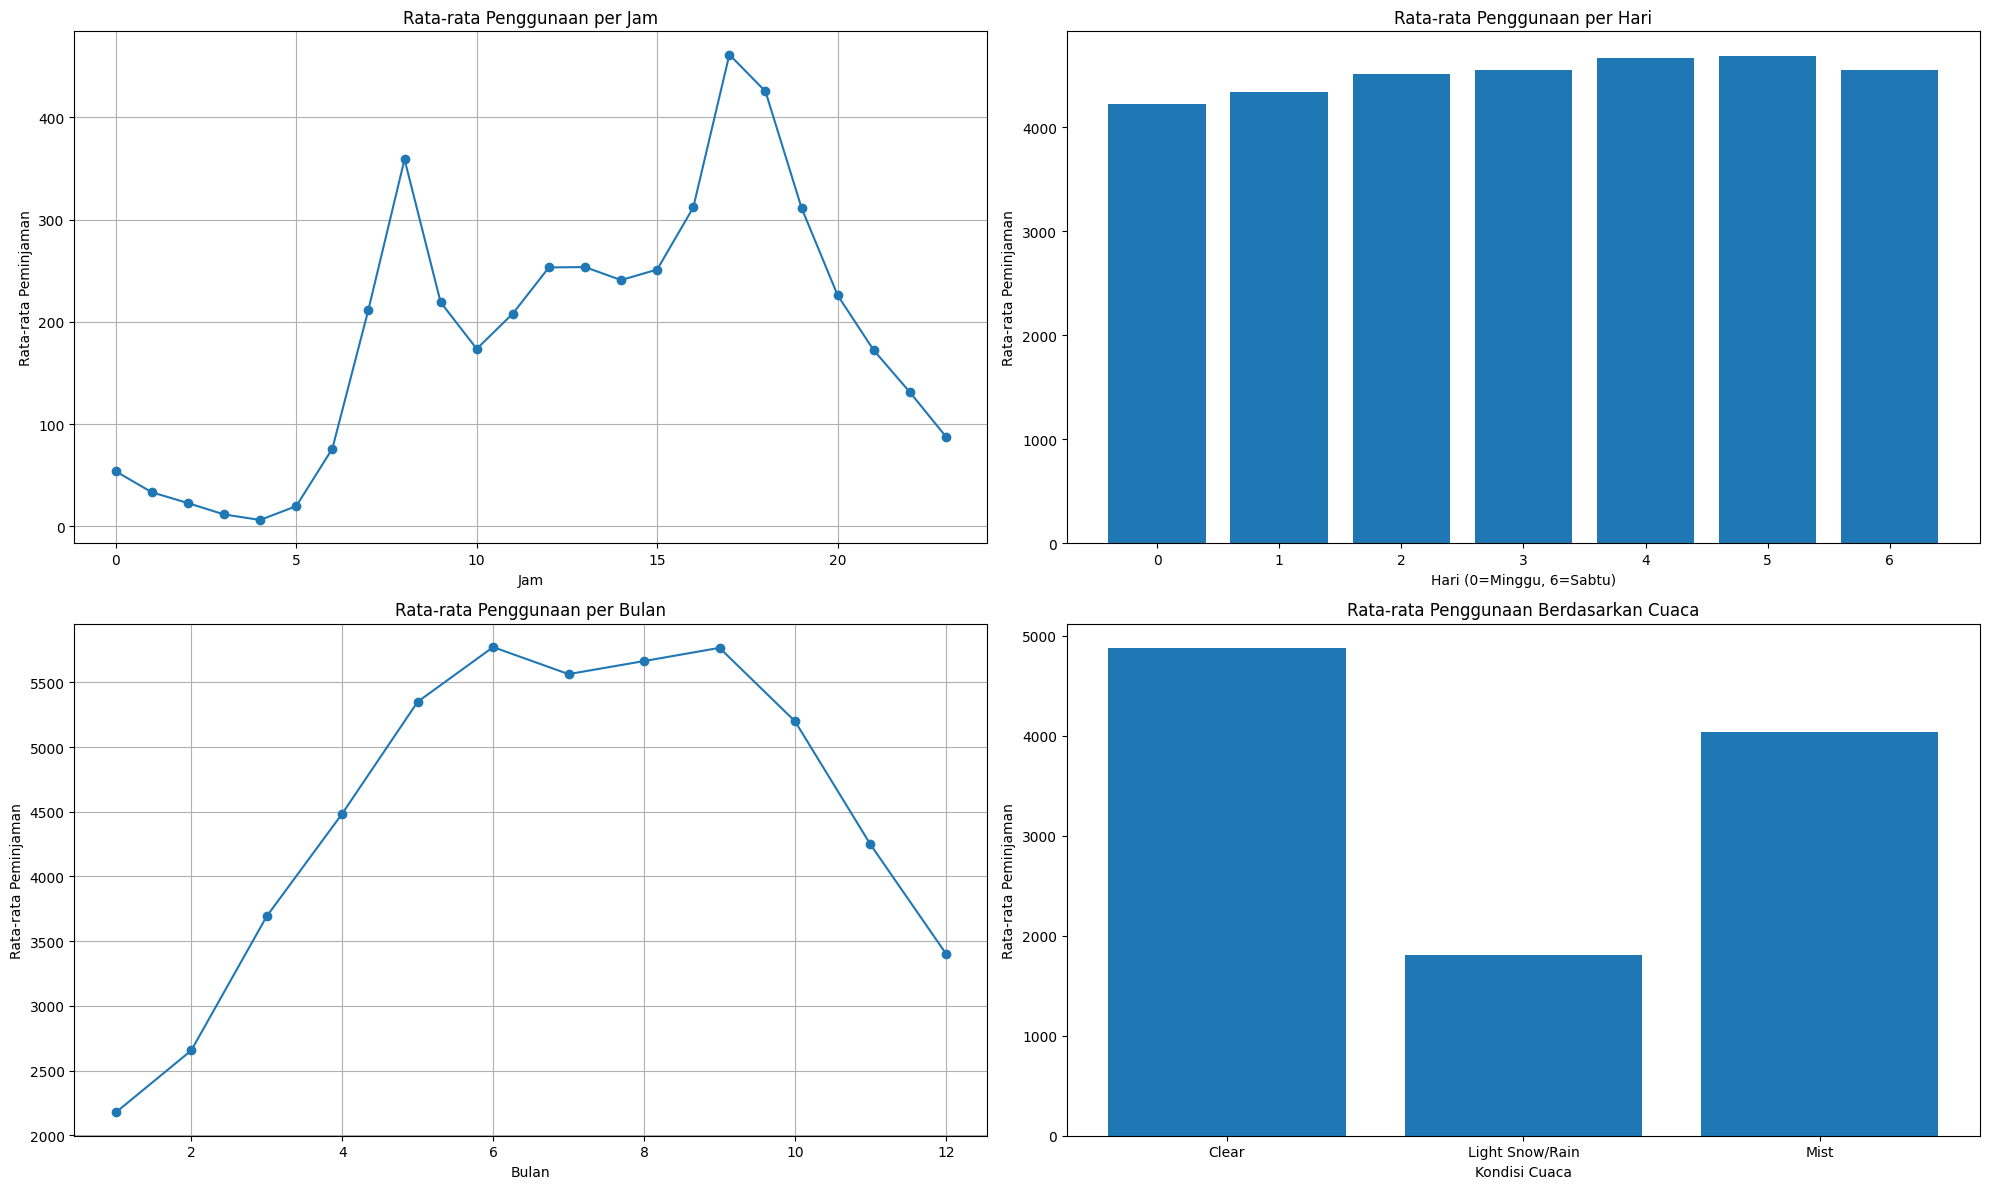

In [11]:
# 1. Pola Penggunaan Berdasarkan Waktu
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Pola per jam
hourly_avg = df_hour_clean.groupby('hr')['cnt'].mean()
axes[0,0].plot(hourly_avg.index, hourly_avg.values, marker='o')
axes[0,0].set_title('Rata-rata Penggunaan per Jam')
axes[0,0].set_xlabel('Jam')
axes[0,0].set_ylabel('Rata-rata Peminjaman')
axes[0,0].grid(True)

# Pola per hari dalam seminggu
daily_avg = df_day_clean.groupby('weekday')['cnt'].mean()
axes[0,1].bar(daily_avg.index, daily_avg.values)
axes[0,1].set_title('Rata-rata Penggunaan per Hari')
axes[0,1].set_xlabel('Hari (0=Minggu, 6=Sabtu)')
axes[0,1].set_ylabel('Rata-rata Peminjaman')

# Pola per bulan
monthly_avg = df_day_clean.groupby('mnth')['cnt'].mean()
axes[1,0].plot(monthly_avg.index, monthly_avg.values, marker='o')
axes[1,0].set_title('Rata-rata Penggunaan per Bulan')
axes[1,0].set_xlabel('Bulan')
axes[1,0].set_ylabel('Rata-rata Peminjaman')
axes[1,0].grid(True)

# Pola berdasarkan cuaca
weather_avg = df_day_clean.groupby('weathersit')['cnt'].mean()
axes[1,1].bar(weather_avg.index, weather_avg.values)
axes[1,1].set_title('Rata-rata Penggunaan Berdasarkan Cuaca')
axes[1,1].set_xlabel('Kondisi Cuaca')
axes[1,1].set_ylabel('Rata-rata Peminjaman')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa faktor-faktor yang paling mempengaruhi jumlah peminjaman sepeda dan bagaimana korelasi antara faktor-faktor tersebut dengan tingkat permintaan?

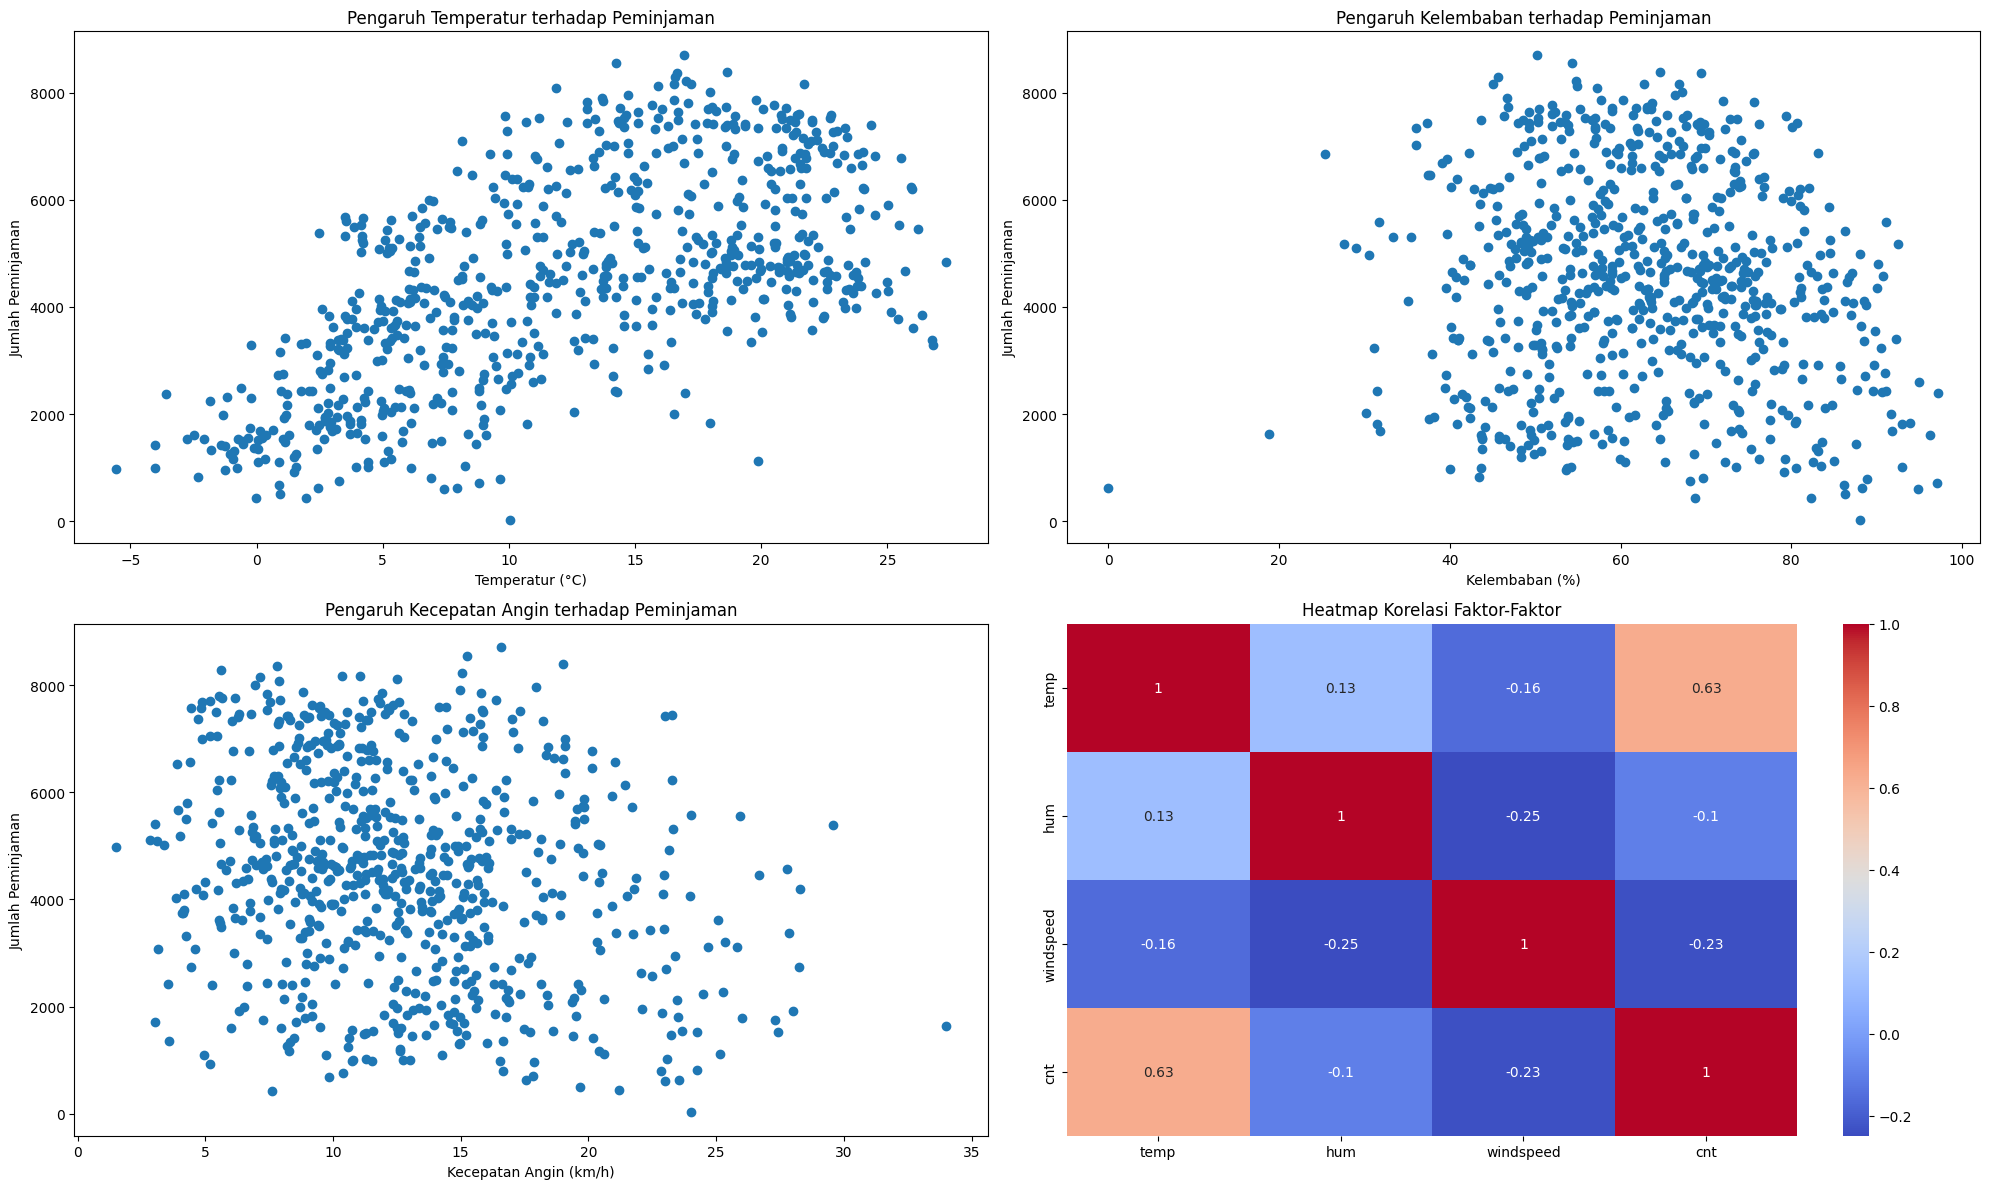


Korelasi dengan Jumlah Peminjaman (cnt):
cnt          1.000000
temp         0.627494
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64


In [12]:
# 1. Korelasi antara Faktor Cuaca dengan Peminjaman
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Pengaruh Temperatur
axes[0,0].scatter(df_day_clean['temp'], df_day_clean['cnt'])
axes[0,0].set_title('Pengaruh Temperatur terhadap Peminjaman')
axes[0,0].set_xlabel('Temperatur (°C)')
axes[0,0].set_ylabel('Jumlah Peminjaman')

# Pengaruh Kelembaban
axes[0,1].scatter(df_day_clean['hum'], df_day_clean['cnt'])
axes[0,1].set_title('Pengaruh Kelembaban terhadap Peminjaman')
axes[0,1].set_xlabel('Kelembaban (%)')
axes[0,1].set_ylabel('Jumlah Peminjaman')

# Pengaruh Kecepatan Angin
axes[1,0].scatter(df_day_clean['windspeed'], df_day_clean['cnt'])
axes[1,0].set_title('Pengaruh Kecepatan Angin terhadap Peminjaman')
axes[1,0].set_xlabel('Kecepatan Angin (km/h)')
axes[1,0].set_ylabel('Jumlah Peminjaman')

# Heatmap Korelasi
numeric_cols = ['temp', 'hum', 'windspeed', 'cnt']
correlation = df_day_clean[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Heatmap Korelasi Faktor-Faktor')

plt.tight_layout()
plt.show()

# Menampilkan statistik korelasi
print("\nKorelasi dengan Jumlah Peminjaman (cnt):")
correlations = df_day_clean[numeric_cols].corr()['cnt'].sort_values(ascending=False)
print(correlations)

**Insights dari Visualization & Explanatory Analysis:**

Pertanyaan 1: Pola Penggunaan Berdasarkan Waktu dan Cuaca

1. Pola Harian (Per Jam):
   * Dua puncak utama: pagi (~ 08:00) dan sore (~ 17:00-18:00)
   * Puncak sore lebih tinggi (~ 450 peminjaman) vs pagi (~ 350 peminjaman)
   * Penggunaan terendah: 00:00-05:00 (<50 peminjaman)
   * Menunjukkan pola commuting yang jelas

2. Pola Mingguan:
   * Relatif stabil sepanjang minggu (4000-4500 peminjaman)
   * Sedikit peningkatan pada hari kerja (Senin-Jumat)
   * Weekend tetap ramai menunjukkan penggunaan rekreasional

3. Pola Bulanan:
   * Puncak di musim panas (bulan 6-9) dengan ~5500-6000 peminjaman
   * Terendah di musim dingin (bulan 12-2) dengan ~2000-3000 peminjaman
   * Tren meningkat dari awal tahun, puncak di tengah, menurun di akhir tahun

4. Pengaruh Cuaca:
   * Cuaca Cerah: Peminjaman tertinggi (~4800)
   * Cuaca Berkabut: Peminjaman moderat (~4000)
   * Hujan/Salju Ringan: Peminjaman terendah (~1700)

Pertanyaan 2: Faktor-faktor yang Mempengaruhi Peminjaman

1. Korelasi dengan Total Peminjaman:
   * Temperatur: Korelasi positif kuat (0.627)
   * Kecepatan Angin: Korelasi negatif lemah (-0.235)
   * Kelembaban: Korelasi negatif sangat lemah (-0.101)

2. Implikasi untuk Optimalisasi:
   * Fokus penyediaan sepeda pada jam puncak (08:00 dan 17:00-18:00)
   * Antisipasi peningkatan permintaan di musim panas
   * Penyesuaian stok saat cuaca buruk
   * Mempertahankan layanan stabil di hari kerja dan weekend

## Analisis Lanjutan (Opsional)

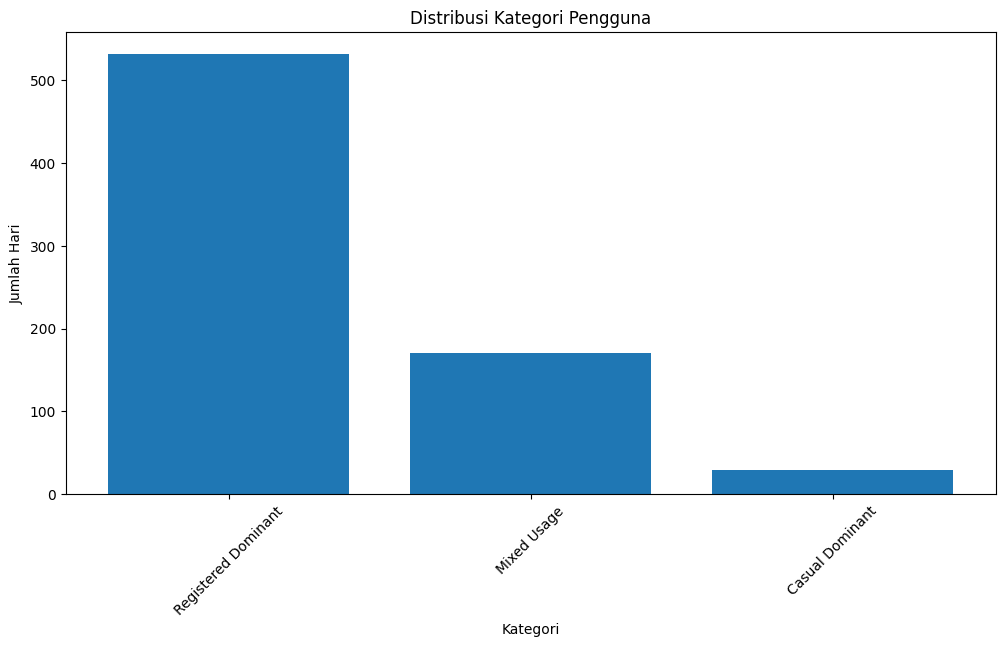

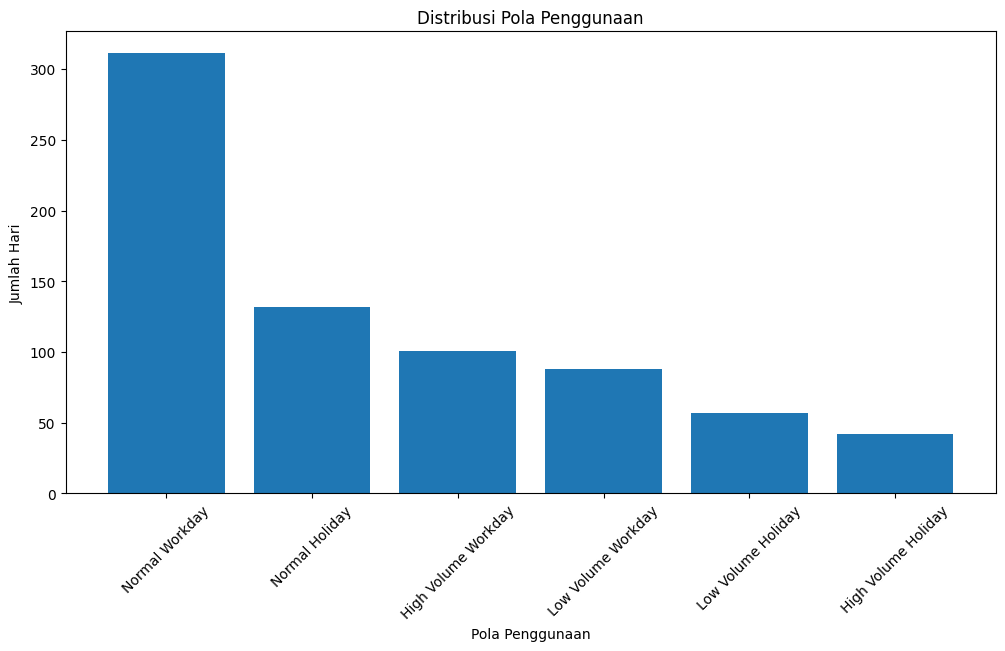

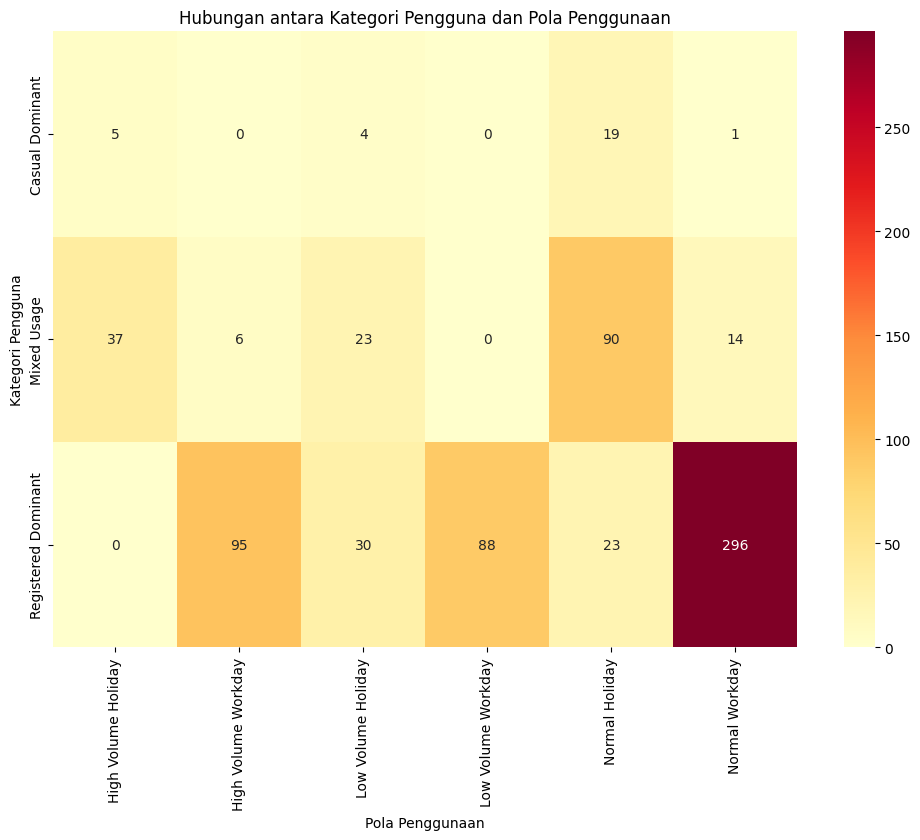


Insights dari Analisis Clustering:

1. Segmentasi Pengguna (%):
user_category
Registered Dominant    72.8
Mixed Usage            23.3
Casual Dominant         4.0
Name: proportion, dtype: float64

2. Pola Penggunaan (%):
usage_pattern
Normal Workday         42.5
Normal Holiday         18.1
High Volume Workday    13.8
Low Volume Workday     12.0
Low Volume Holiday      7.8
High Volume Holiday     5.7
Name: proportion, dtype: float64

3. Pengaruh Cuaca terhadap Pola Penggunaan:
usage_pattern  High Volume Holiday  High Volume Workday  Low Volume Holiday  \
weathersit                                                                    
1                               37                   80                  35   
2                                5                   21                  18   
3                                0                    0                   4   

usage_pattern  Low Volume Workday  Normal Holiday  Normal Workday  
weathersit                                             

In [16]:
# Analisis Lanjutan: Manual Clustering berdasarkan Frequency dan Usage Pattern

# 1. Frequency Analysis
df_day['total_users'] = df_day['casual'] + df_day['registered']
df_day['casual_ratio'] = df_day['casual'] / df_day['total_users']

# Membuat fungsi untuk kategorisasi pengguna
def categorize_frequency(row):
    if row['casual'] == 0:
        return 'Registered Only'
    elif row['registered'] == 0:
        return 'Casual Only'
    elif row['casual_ratio'] > 0.4:
        return 'Casual Dominant'
    elif row['casual_ratio'] < 0.2:
        return 'Registered Dominant'
    else:
        return 'Mixed Usage'

df_day['user_category'] = df_day.apply(categorize_frequency, axis=1)

# Visualisasi distribusi kategori pengguna
plt.figure(figsize=(12, 6))
user_dist = df_day['user_category'].value_counts()
plt.bar(user_dist.index, user_dist.values)
plt.title('Distribusi Kategori Pengguna')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.show()

# 2. Usage Pattern Clustering
# Hitung mean dan std terlebih dahulu
cnt_mean = df_day['cnt'].mean()
cnt_std = df_day['cnt'].std()

def categorize_usage_pattern(row):
    if row['workingday'] == 1:
        if row['cnt'] > cnt_mean + cnt_std:
            return 'High Volume Workday'
        elif row['cnt'] < cnt_mean - cnt_std:
            return 'Low Volume Workday'
        else:
            return 'Normal Workday'
    else:
        if row['cnt'] > cnt_mean + cnt_std:
            return 'High Volume Holiday'
        elif row['cnt'] < cnt_mean - cnt_std:
            return 'Low Volume Holiday'
        else:
            return 'Normal Holiday'

df_day['usage_pattern'] = df_day.apply(categorize_usage_pattern, axis=1)

# Visualisasi pola penggunaan
plt.figure(figsize=(12, 6))
pattern_dist = df_day['usage_pattern'].value_counts()
plt.bar(pattern_dist.index, pattern_dist.values)
plt.title('Distribusi Pola Penggunaan')
plt.xlabel('Pola Penggunaan')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.show()

# 3. Analisis Cross-Pattern
cross_pattern = pd.crosstab(df_day['user_category'], df_day['usage_pattern'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_pattern, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Hubungan antara Kategori Pengguna dan Pola Penggunaan')
plt.xlabel('Pola Penggunaan')
plt.ylabel('Kategori Pengguna')
plt.show()

# Insights dari Analisis Lanjutan
print("\nInsights dari Analisis Clustering:")
print("\n1. Segmentasi Pengguna (%):")
print(df_day['user_category'].value_counts(normalize=True).round(3) * 100)
print("\n2. Pola Penggunaan (%):")
print(df_day['usage_pattern'].value_counts(normalize=True).round(3) * 100)

# Analisis korelasi antara pola dan cuaca
weather_pattern = pd.crosstab(df_day['weathersit'], df_day['usage_pattern'])
print("\n3. Pengaruh Cuaca terhadap Pola Penggunaan:")
print(weather_pattern)

# Tambahan: Analisis statistik deskriptif untuk setiap cluster
print("\n4. Statistik Deskriptif per Kategori Pengguna:")
print(df_day.groupby('user_category')['cnt'].describe().round(2))

## Conclusion

- **Conclusion Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu dan faktor cuaca?**

  1. **Pola Waktu & Segmentasi Pengguna:**
     * **Registered users:**
       - Peak hours jelas: pagi (08:00) dan sore (17:00-18:00).
       - Dominan di hari kerja (3,978 vs 606 casual users).
       - Pola konsisten menunjukkan penggunaan untuk komuting.
       - Berdasarkan clustering, 72.8% hari didominasi registered users.
     * **Casual users:**
       - Puncak di siang-sore hari.
       - Lebih aktif di hari libur (1,371 vs 2,959 registered).
       - Hanya 4% hari yang didominasi casual users.
       - 23.3% hari menunjukkan penggunaan campuran (mixed usage).

  2. **Pola Musiman:**
     * **Fall:** Musim tersibuk (4,441 registered, 1,202 casual).
     * **Summer:** Musim kedua tersibuk (3,886 registered, 1,106 casual).
     * **Winter & Spring:** Aktivitas lebih rendah.
     * **Rasio casual/registered** tertinggi di Summer (0.284) dan Fall (0.270).

  3. **Pengaruh Cuaca:**
     * Kedua segmen menunjukkan penurunan signifikan saat cuaca buruk.
     * Registered users lebih konsisten dalam penggunaan di berbagai kondisi cuaca.
     * Casual users lebih sensitif terhadap perubahan cuaca.
     * Cuaca cerah menghasilkan volume tinggi: 80 hari kerja dan 37 hari libur dengan volume tinggi.

- **Conclusion Pertanyaan 2: Faktor-faktor yang mempengaruhi peminjaman?**

  1. **Faktor Utama:**
     * **Jenis Hari & Pola Penggunaan:**
       - 42.5% hari adalah "Normal Workday"
       - 18.1% "Normal Holiday"
       - 13.8% "High Volume Workday"
       - Volume tinggi lebih umum pada hari kerja (13.8%) vs hari libur (5.7%)
     * **Musim:**
       - Mempengaruhi volume total peminjaman.
       - Fall dan Summer menunjukkan aktivitas tertinggi.
     * **Cuaca:**
       - Cuaca buruk (kategori 3) hampir selalu menghasilkan volume rendah.
       - Dari 17 hari dengan cuaca buruk, 16 hari menunjukkan volume rendah.

  2. **Rekomendasi Strategis:**
     * **Strategi Segmentasi:**
       - Fokus utama pada registered users (72.8% hari).
       - Program khusus untuk meningkatkan casual users di 23.3% hari mixed usage.
     * **Manajemen Armada:**
       - Alokasi berbeda untuk workday (68.3% total hari) vs holiday (31.7%).
       - Antisipasi volume tinggi di 19.5% total hari (13.8% workday + 5.7% holiday).
     * **Marketing:**
       - Promosi membership di musim-musim ramai.
       - Target konversi di hari-hari "Mixed Usage" (23.3%).
       - Program khusus untuk mengoptimalkan penggunaan di volume rendah (19.8% total hari).